In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
from cytominer_eval.transform import metric_melt
from sklearn.decomposition import PCA
from pycytominer.cyto_utils import infer_cp_features
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import data_selection as ds
from utils import eval

In [5]:
batch = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/01_data/level_3_data/sub_level3.csv')
b = batch[['Metadata_Batch_Number', 'Metadata_Plate', 'Metadata_Well']]
meta = pd.read_csv('../baseline/meta.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (8,9,16,17,18,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
name = 'base'
df = pd.read_csv('aggregated_efficientnet_median.csv')
e = eval.evaluation(df)
df = e.norm_agg()
exec(name + "_hit = eval.hitk_prep(e.eval(df, operation = 'hitk'))")
exec(name + "_enr = e.eval(df, operation = 'enrichment')")

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


6400 features were identified


In [28]:
base_pre_all = e.eval(df, operation = 'precision_recall')

In [29]:
base_pre = eval.prec_mean(base_pre_all)

In [9]:
# select subsections
index812 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/812_index.csv')

# 812
Top 50 MOAs

In [10]:
df812_in = df[df.Metadata_moa.isin(index812['Metadata_moa'].unique().tolist())]
df812_out = df[~df.Metadata_moa.isin(index812['Metadata_moa'].unique().tolist())]

In [11]:
name = "df812_in"
e = eval.evaluation(df812_in)
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

6400 features were identified


In [12]:
name = "df812_out"
exec("e = eval.evaluation(" + name+ ")")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

6400 features were identified


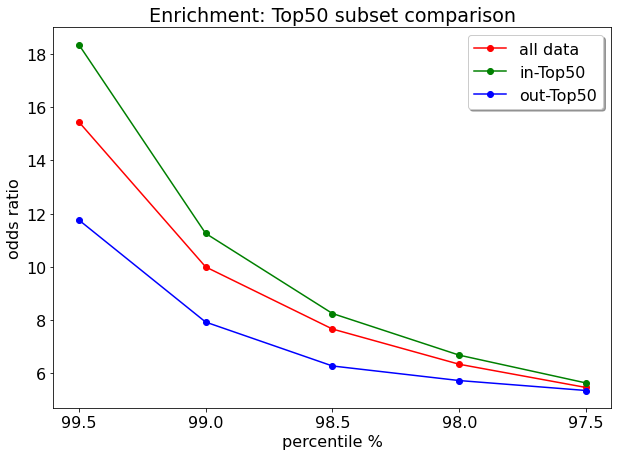

In [16]:
eval.plotting.enrichment('Enrichment: Top50 subset comparison',  index1=base_enr, label_1="all data", index2=df812_in_enr, label_2="in-Top50", index3=df812_out_enr, label_3="out-Top50" )

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*base_enr["enrichment_percentile"], base_enr["ods_ratio"], marker="o", color="green", label = 'all classes')
plt.plot(100*df812_in_enr["enrichment_percentile"], df812_in_enr["ods_ratio"], marker="o", color="red", label = 'in index')
plt.plot(100*df812_out_enr["enrichment_percentile"], df812_out_enr["ods_ratio"], marker="o", color="orange", label = 'out of index')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

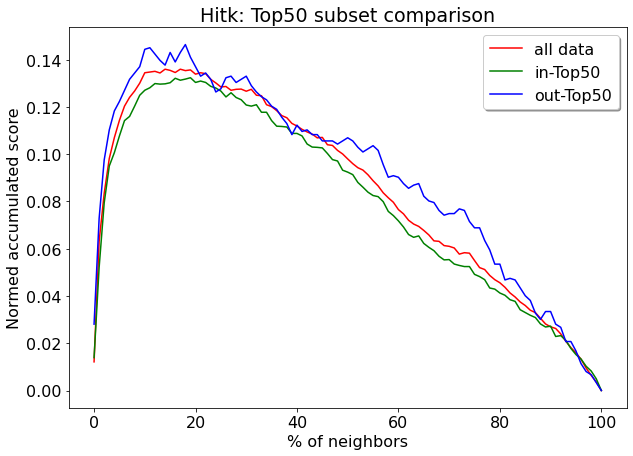

In [19]:
eval.plotting.hitk('Hitk: Top50 subset comparison',  index1=base_hit, label_1="all data", index2=df812_in_hit, label_2="in-Top50", index3=df812_out_hit, label_3="out-Top50")

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_hit, marker=".", color="g", label = 'base')
plt.plot(df812_in_hit, marker=".", color="r", label = 'in')
plt.plot(df812_out_hit, marker=".", color="y", label = 'out')
plt.legend(loc = 'center right', shadow=True)
plt.show()



In [33]:
base_pre_in = base_pre_all[base_pre_all.Metadata_broad_sample.isin(index812['Metadata_broad_sample'].unique().tolist())]
pr_av = []
for k in base_pre_in.k.unique():
    pr_av.append(base_pre_in.query("k==@k").mean().tolist())
base_pre_in = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])
base_pre_in

,k,precision,recall
0,5.0,0.120548,0.066414
1,10.0,0.097065,0.102315
2,15.0,0.080626,0.123148
3,20.0,0.070548,0.140148
4,25.0,0.063640,0.155883
5,30.0,0.058904,0.169902
6,40.0,0.051027,0.190430
7,50.0,0.045636,0.209827


In [34]:
base_pre_out = base_pre_all[~base_pre_all.Metadata_broad_sample.isin(index812['Metadata_broad_sample'].unique().tolist())]
pr_av = []
for k in base_pre_out.k.unique():
    pr_av.append(base_pre_out.query("k==@k").mean().tolist())
base_pre_out = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])
base_pre_out

,k,precision,recall
0,5.0,0.036392,0.059844
1,10.0,0.026582,0.081611
2,15.0,0.021519,0.098897
3,20.0,0.018275,0.109335
4,25.0,0.016139,0.119972
5,30.0,0.014504,0.130360
6,40.0,0.013054,0.155689
7,50.0,0.011772,0.173646


In [22]:
df812_out_enr['ods_ratio_out'] = df812_out_enr['ods_ratio']
df812_in_enr['ods_ratio_in'] = df812_in_enr['ods_ratio']
base_pre_in.rename(columns = {'precision' : 'precision_in','recall' : 'recall_in'}, inplace=True)
base_pre_out.rename(columns = {'precision' : 'precision_out','recall' : 'recall_out'}, inplace=True)

res = pd.concat([df812_out_enr, df812_in_enr, base_pre_in, base_pre_out], axis=1)
res.to_csv('pretrained_in_out.csv')

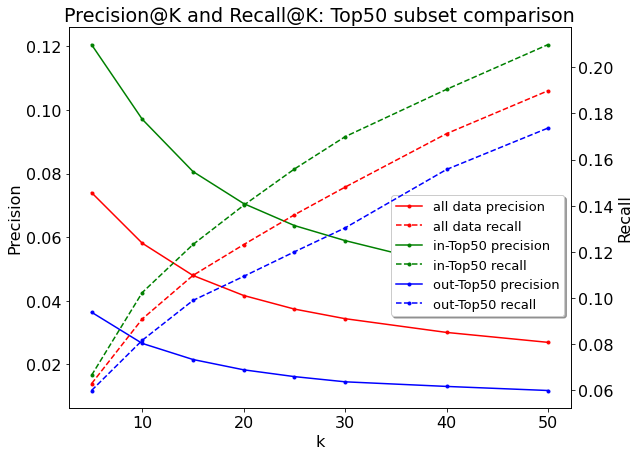

In [36]:
eval.plotting.prec_recall('Precision@K and Recall@K: Top50 subset comparison', fontsize= 13, index1=base_pre, label_1="all data", index2=base_pre_in, label_2="in-Top50", index3=base_pre_out, label_3="out-Top50")

KeyError: 'precision'

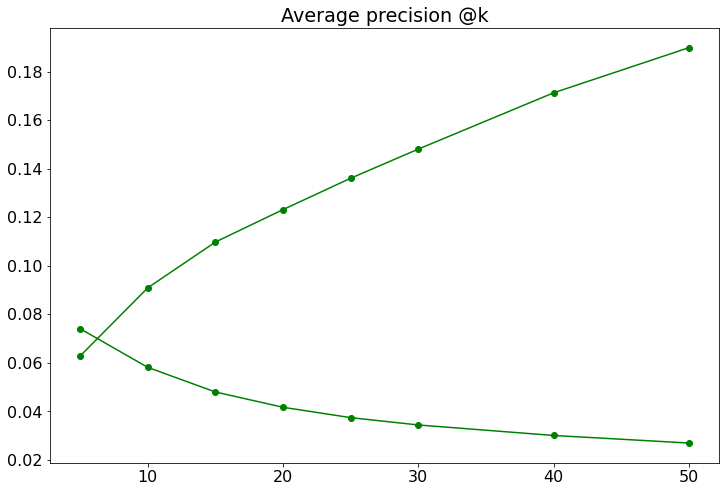

In [26]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_pre["k"], base_pre["precision"], marker="o", color="green", label = 'base')
plt.plot(base_pre["k"], base_pre["recall"], marker="o", color="g")
plt.plot(base_pre_in["k"], base_pre_in["precision"], marker="o", color="r", label = 'in')
plt.plot(base_pre_in["k"], base_pre_in["recall"], marker="o", color="red")
plt.plot(base_pre_out["k"], base_pre_out["precision"], marker="o", color="y", label = 'out')
plt.plot(base_pre_out["k"], base_pre_out["recall"], marker="o", color="y")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [87]:
df812_in_enr.to_csv('../plot_storage/df812_in_enr.csv')
pd.DataFrame(df812_in_hit).to_csv('../plot_storage/df812_in_hit.csv')

df812_out_enr.to_csv('../plot_storage/df812_out_enr.csv')
pd.DataFrame(df812_in_hit).to_csv('../plot_storage/df812_out_hit.csv')

In [31]:
base_pre


,k,precision,recall
0,5.0,0.074016,0.062781
1,10.0,0.058093,0.090867
2,15.0,0.047944,0.109739
3,20.0,0.041645,0.123110
4,25.0,0.037375,0.136027
5,30.0,0.034354,0.148038
6,40.0,0.030031,0.171221
7,50.0,0.026912,0.189822


# new 1025
High phenotype MOAs

In [37]:
select = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/new_high_pheno.csv')

In [38]:
len(select['0'].tolist())

489

In [39]:
df1025_in = df[df.Metadata_broad_sample.isin(select['0'].tolist())]
df1025_out = df[~df.Metadata_broad_sample.isin(select['0'].tolist())]

In [40]:
print(df1025_in.shape)
print(df1025_out.shape)

(489, 6402)
(655, 6402)


In [41]:
name = "df1025_in"
e = eval.evaluation(df1025_in)
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

6400 features were identified


In [42]:
name = "df1025_out"
exec("e = eval.evaluation(" + name + ")")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

6400 features were identified


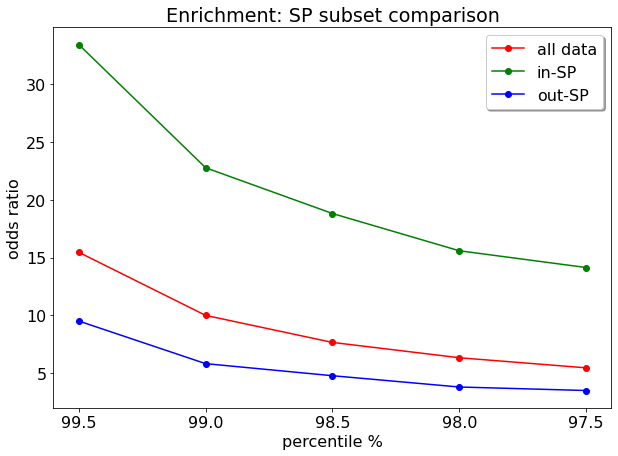

In [44]:
eval.plotting.enrichment('Enrichment: SP subset comparison',  index1=base_enr, label_1="all data", index2=df1025_in_enr, label_2="in-SP", index3=df1025_out_enr, label_3="out-SP" )

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*base_enr["enrichment_percentile"], base_enr["ods_ratio"], marker="o", color="green", label = 'all classes')
plt.plot(100*df1025_in_enr["enrichment_percentile"], df1025_in_enr["ods_ratio"], marker="o", color="red", label = 'in index')
plt.plot(100*df1025_out_enr["enrichment_percentile"], df1025_out_enr["ods_ratio"], marker="o", color="orange", label = 'out of index')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()


In [45]:
base_pre_in = base_pre_all[base_pre_all.Metadata_broad_sample.isin(select['0'].tolist())]
pr_av = []
for k in base_pre_in.k.unique():
    pr_av.append(base_pre_in.query("k==@k").mean().tolist())
base_pre_in = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])

In [46]:
base_pre_out = base_pre_all[~base_pre_all.Metadata_broad_sample.isin(select['0'].tolist())]
pr_av = []
for k in base_pre_out.k.unique():
    pr_av.append(base_pre_out.query("k==@k").mean().tolist())
base_pre_out = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])

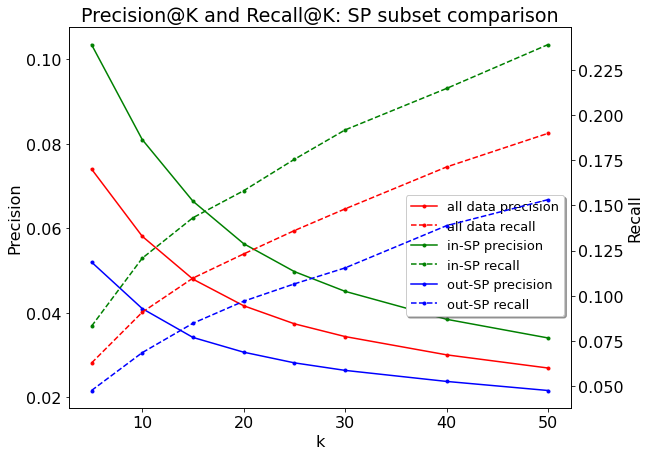

In [47]:
eval.plotting.prec_recall('Precision@K and Recall@K: SP subset comparison', fontsize= 13, index1=base_pre, label_1="all data", index2=base_pre_in, label_2="in-SP", index3=base_pre_out, label_3="out-SP")

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_pre["k"], base_pre["precision"], marker="o", color="green", label = 'base')
plt.plot(base_pre["k"], base_pre["recall"], marker="o", color="g")
plt.plot(base_pre_in["k"], base_pre_in["precision"], marker="o", color="r", label = 'in')
plt.plot(base_pre_in["k"], base_pre_in["recall"], marker="o", color="red")
plt.plot(base_pre_out["k"], base_pre_out["precision"], marker="o", color="y", label = 'out')
plt.plot(base_pre_out["k"], base_pre_out["recall"], marker="o", color="y")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()

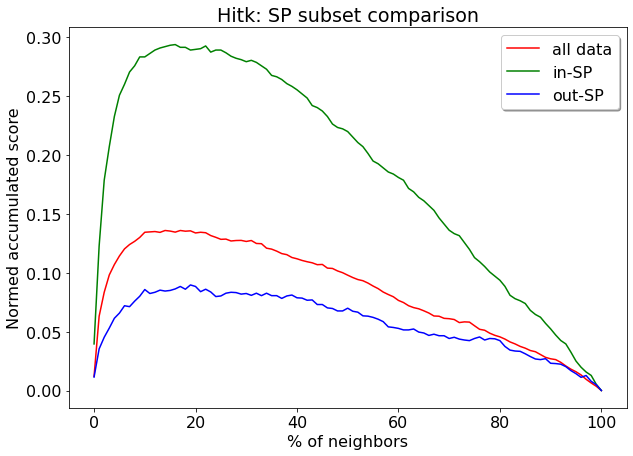

In [48]:
eval.plotting.hitk('Hitk: SP subset comparison',  index1=base_hit, label_1="all data", index2=df1025_in_hit, label_2="in-SP", index3=df1025_out_hit, label_3="out-SP")

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_hit, marker=".", color="g", label = 'base')
plt.plot(df1025_in_hit, marker=".", color="r", label = 'in')
plt.plot(df1025_out_hit, marker=".", color="y", label = 'out')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [38]:
compounds812 = index812['Metadata_broad_sample'].unique().tolist()
compounds_high = select["0"].tolist()

In [39]:
overlap = [f for f in compounds_high if f in compounds812]


In [41]:
len(overlap)

225

In [42]:
len([f for f in compounds812  if f in compounds_high])


225

In [86]:
# save for later
df1025_in_enr.to_csv('../plot_storage/df1025_in_enr.csv')
pd.DataFrame(df1025_in_hit).to_csv('../plot_storage/df1025_in_hit.csv')
base_pre_in.to_csv('../plot_storage/df1025_in_pre.csv')

df1025_out_enr.to_csv('../plot_storage/df1025_out_enr.csv')
pd.DataFrame(df1025_in_hit).to_csv('../plot_storage/df1025_out_hit.csv')
base_pre_out.to_csv('../plot_storage/df1025_out_pre.csv')

In [ ]:
# RANDOM
Random compounds

In [45]:
# random = df.sample(frac=0.5)

,Metadata_broad_sample,efficientnet_0,efficientnet_1,efficientnet_2,efficientnet_3,efficientnet_4,efficientnet_5,efficientnet_6,efficientnet_7,efficientnet_8,...,efficientnet_6391,efficientnet_6392,efficientnet_6393,efficientnet_6394,efficientnet_6395,efficientnet_6396,efficientnet_6397,efficientnet_6398,efficientnet_6399,Metadata_moa
0,BRD-A00218260-001-03-4,-72.828449,-55.773609,-40.403340,-34.170740,-20.999737,45.958046,-29.436319,-41.674353,-20.579987,...,-78.950538,-3.445345,1.259031,-20.031577,12.396901,-18.307676,-16.403230,68.826533,33.624756,sterol demethylase inhibitor
1,BRD-A00376169-001-01-6,-95.980427,-90.263017,4.343328,-56.177401,31.910187,15.300521,4.884019,45.920111,-29.832563,...,4.879156,9.922194,33.721464,-36.295512,-43.619686,-55.151022,-26.835644,50.840917,-17.951135,neprilysin inhibitor
2,BRD-A00546892-001-02-6,16.168891,29.516389,-42.738334,-4.932246,-5.808257,-29.790251,-8.050693,60.488204,-21.770234,...,8.479258,-4.666897,24.479516,31.220120,-39.557220,19.087297,0.666493,8.065159,-43.870243,acetylcholine receptor antagonist
6,BRD-A02006392-001-10-7,63.864932,-59.449654,8.434359,10.192491,-44.711152,-8.038250,11.673191,40.048187,-5.022623,...,-1.108295,-4.136335,-94.529749,-3.234366,-15.126104,-6.868428,-49.159937,24.075486,-41.613302,calcium channel blocker
7,BRD-A02367930-001-04-5,-120.809763,-103.524407,134.412836,-49.429687,101.368812,114.213171,21.832956,-51.200380,99.137010,...,183.880328,67.771771,65.043980,-105.936725,35.027140,-21.679609,-82.699174,32.103780,35.677070,estrogen receptor agonist|estrogenic hormone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,BRD-K98624455-074-02-8,-9.002550,-37.052405,34.071107,36.862516,8.583048,-16.066498,-37.990138,-36.962217,18.931315,...,-20.291812,-6.020546,-5.782538,-6.162128,-26.050282,15.514571,-15.647063,30.496629,32.661588,histamine receptor antagonist
1131,BRD-K99092662-001-01-1,4.092917,15.038401,16.047922,85.879130,60.880535,25.570035,8.036911,-6.945409,25.206291,...,-18.093050,-4.949920,-15.103150,-3.779959,-73.293745,-39.329978,21.129830,21.078175,-20.809881,androgen receptor modulator
1134,BRD-K99257182-310-01-6,-68.911836,-5.954311,30.473972,-60.716788,50.044327,-26.675309,11.006211,-13.443711,-53.382543,...,-18.198812,-0.260394,-31.863944,1.727762,-7.507103,30.814003,-17.544396,79.308489,-7.612479,sodium channel blocker
1137,BRD-K99475619-001-01-2,-140.439699,336.602186,-1977.468238,-858.789782,-1729.276915,2785.604008,1432.524110,-2579.890042,-21.638526,...,-3257.743070,-22.691163,-1089.191932,-1305.223637,-942.149267,512.786878,-1146.622585,485.337649,1136.481306,topoisomerase inhibitor


In [69]:
dfrandom_in = df.sample(frac=0.5)
dfrandom_out = df[~df["Metadata_broad_sample"].isin(dfrandom_in.Metadata_broad_sample.tolist())]

In [70]:
name = "dfrandom_in"
e = eval.evaluation(dfrandom_in)
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

6400 features were identified


In [71]:
name = "dfrandom_out"
exec("e = eval.evaluation(" + name+ ")")
exec(name + "_hit = eval.hitk_prep(e.eval(" + name + ", operation = 'hitk'))")
exec(name + "_enr = e.eval(" + name + ", operation = 'enrichment')")

6400 features were identified


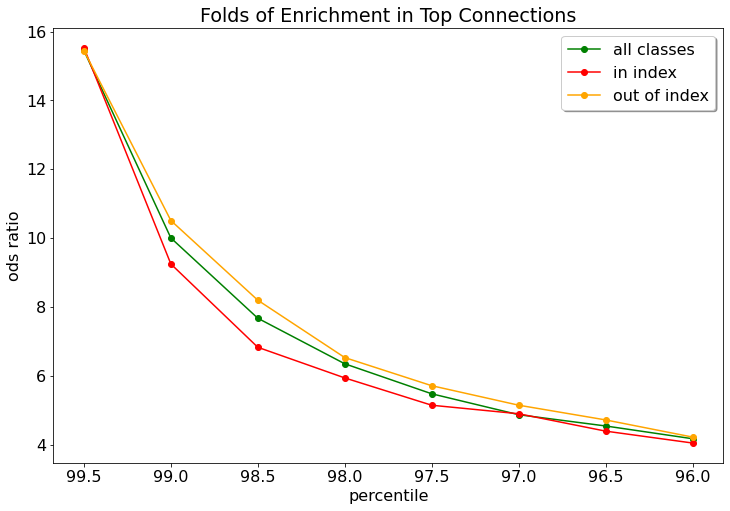

In [72]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*base_enr["enrichment_percentile"], base_enr["ods_ratio"], marker="o", color="green", label = 'all classes')
plt.plot(100*dfrandom_in_enr["enrichment_percentile"], dfrandom_in_enr["ods_ratio"], marker="o", color="red", label = 'in index')
plt.plot(100*dfrandom_out_enr["enrichment_percentile"], dfrandom_out_enr["ods_ratio"], marker="o", color="orange", label = 'out of index')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

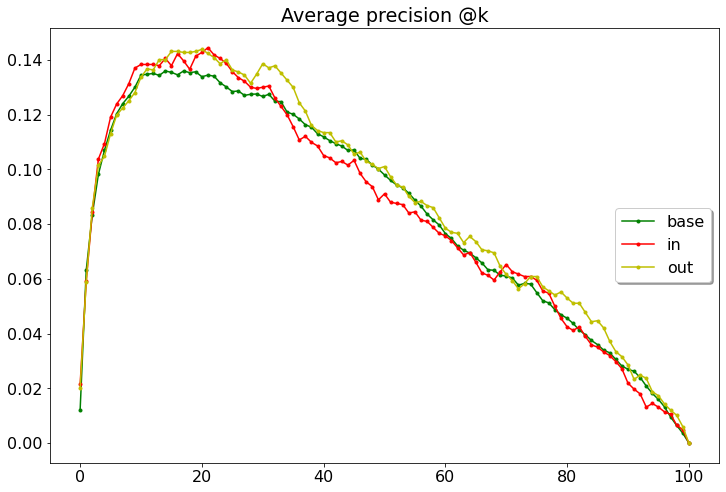

In [73]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_hit, marker=".", color="g", label = 'base')
plt.plot(dfrandom_in_hit, marker=".", color="r", label = 'in')
plt.plot(dfrandom_out_hit, marker=".", color="y", label = 'out')
plt.legend(loc = 'center right', shadow=True)
plt.show()

In [74]:
base_pre_in = base_pre_all[base_pre_all.Metadata_broad_sample.isin(dfrandom_in['Metadata_broad_sample'].unique().tolist())]
pr_av = []
for k in base_pre_in.k.unique():
    pr_av.append(base_pre_in.query("k==@k").mean().tolist())
base_pre_in = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])
base_pre_in

,k,precision,recall
0,5.0,0.073776,0.064322
1,10.0,0.057867,0.090793
2,15.0,0.046154,0.106625
3,20.0,0.039948,0.118622
4,25.0,0.035804,0.131447
5,30.0,0.032751,0.143076
6,40.0,0.029283,0.171294
7,50.0,0.026119,0.190359


In [75]:
base_pre_out = base_pre_all[~base_pre_all.Metadata_broad_sample.isin(dfrandom_in['Metadata_broad_sample'].unique().tolist())]
pr_av = []
for k in base_pre_out.k.unique():
    pr_av.append(base_pre_out.query("k==@k").mean().tolist())
base_pre_out = pd.DataFrame(pr_av, columns=["k", "precision", "recall"])
base_pre_out

,k,precision,recall
0,5.0,0.074256,0.061238
1,10.0,0.058319,0.090942
2,15.0,0.049737,0.112858
3,20.0,0.043345,0.127606
4,25.0,0.038949,0.140614
5,30.0,0.035960,0.153009
6,40.0,0.030779,0.171147
7,50.0,0.027706,0.189283


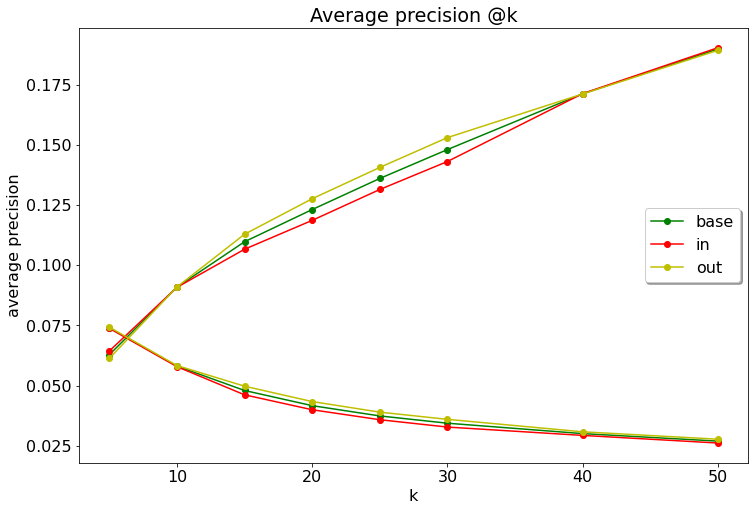

In [76]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(base_pre["k"], base_pre["precision"], marker="o", color="green", label = 'base')
plt.plot(base_pre["k"], base_pre["recall"], marker="o", color="g")
plt.plot(base_pre_in["k"], base_pre_in["precision"], marker="o", color="r", label = 'in')
plt.plot(base_pre_in["k"], base_pre_in["recall"], marker="o", color="red")
plt.plot(base_pre_out["k"], base_pre_out["precision"], marker="o", color="y", label = 'out')
plt.plot(base_pre_out["k"], base_pre_out["recall"], marker="o", color="y")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()